In [19]:
library(ggplot2)

In [2]:
WOMEN_DATASOURCE = './cbWomen.rda'
MEN_DATASOURCE = './cbmen.rda'

# Q.10

We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the runners across all 14 years of the races. Use quan- tile–quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change?


# Load Data

In [3]:
load(WOMEN_DATASOURCE)

In [4]:
load(MEN_DATASOURCE)

# Join datasets

In [5]:
menWomenRaw = rbind(cbmen, cbWomen)

In [6]:
# Only take data where age has a value
menWomen = menWomenRaw[!is.na(menWomenRaw$age),]


# Remove invalid ages

In [7]:
# Take out values where the age is missing, or less than 6 years old.
MenData = cbmen[!is.na(cbmen$age) & cbmen$age >= 6, ]
WomenData = cbWomen[!is.na(cbWomen$age) & cbWomen$age >= 6, ]
# There were 70,070 observations for men and 77,336 for women
nrow(cbmen)
nrow(cbWomen)
# We removed 28 male observations and 17 female
nrow(cbmen) - nrow(MenData)
nrow(cbWomen) - nrow(WomenData)

[1] 70070

[1] 77336

[1] 28

[1] 17

# Visuals

# Box Plots

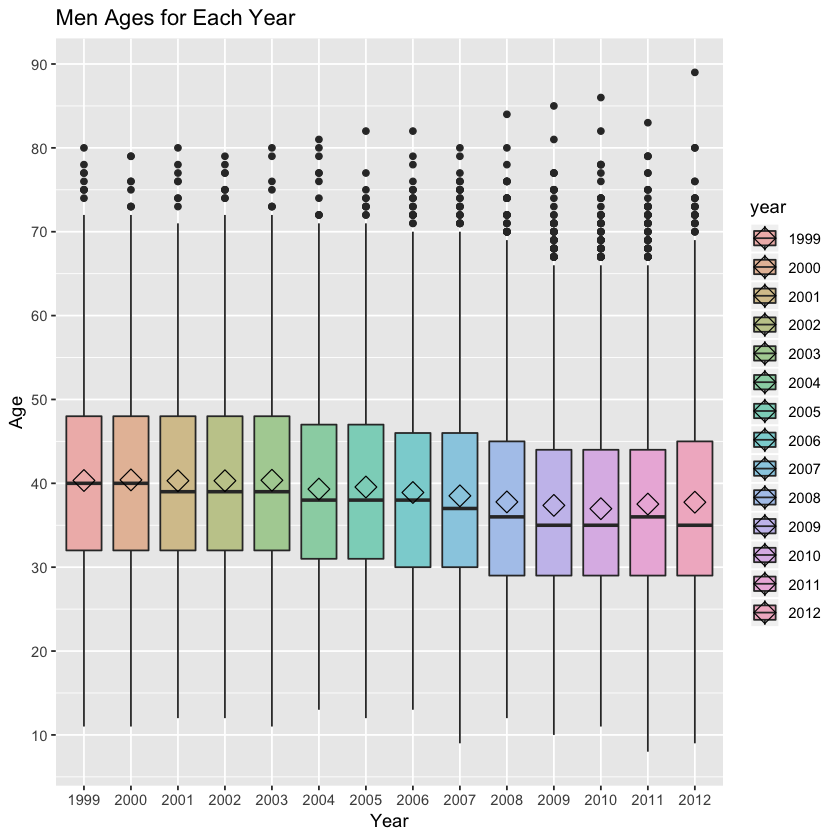

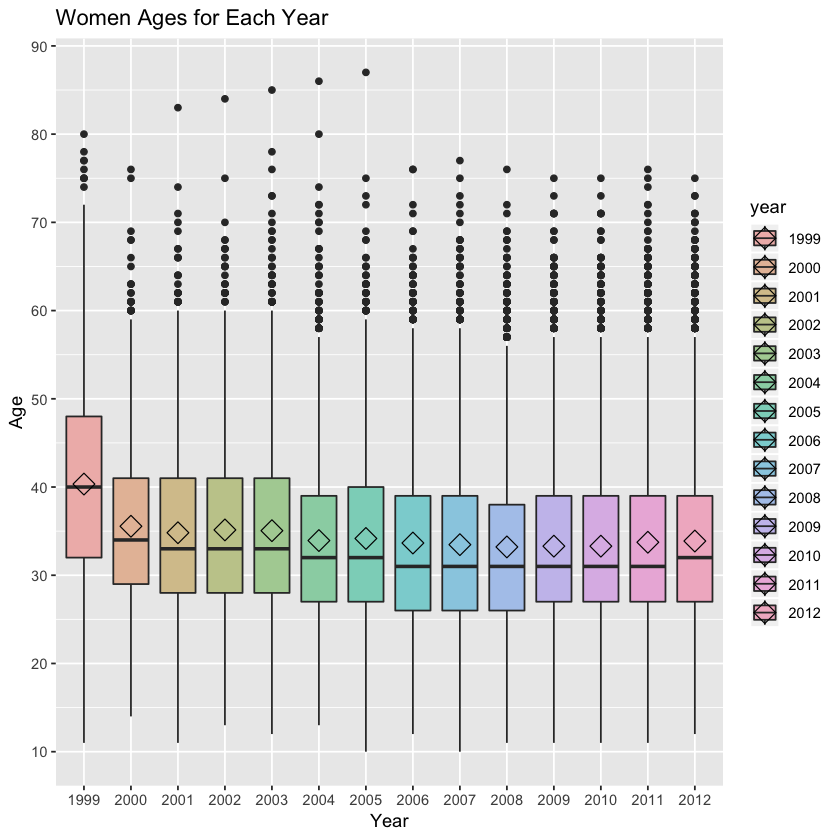

In [8]:
# Box plots first
# Visualize the age of the runners by year: first men, then women

MenPlots <- MenData
MenPlots$year <- as.character(MenPlots$year)

ggplot(MenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(MenPlots$age, n = 10)) + 
    ggtitle("Men Ages for Each Year") + xlab('Year') + ylab('Age') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    scale_fill_hue(l=80, c=35)

WomenPlots <- WomenData
WomenPlots$year <- as.character(WomenPlots$year)

ggplot(WomenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(WomenPlots$age, n = 10)) + 
    ggtitle("Women Ages for Each Year") + xlab('Year') + ylab('Age') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    scale_fill_hue(l=80, c=35)

# Scatter Plots

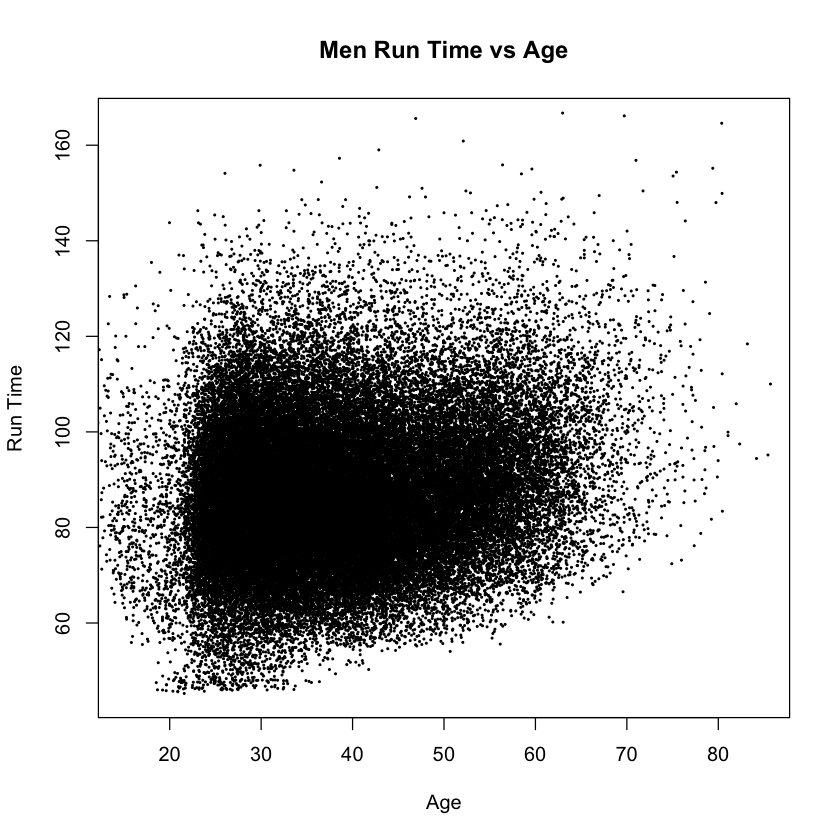

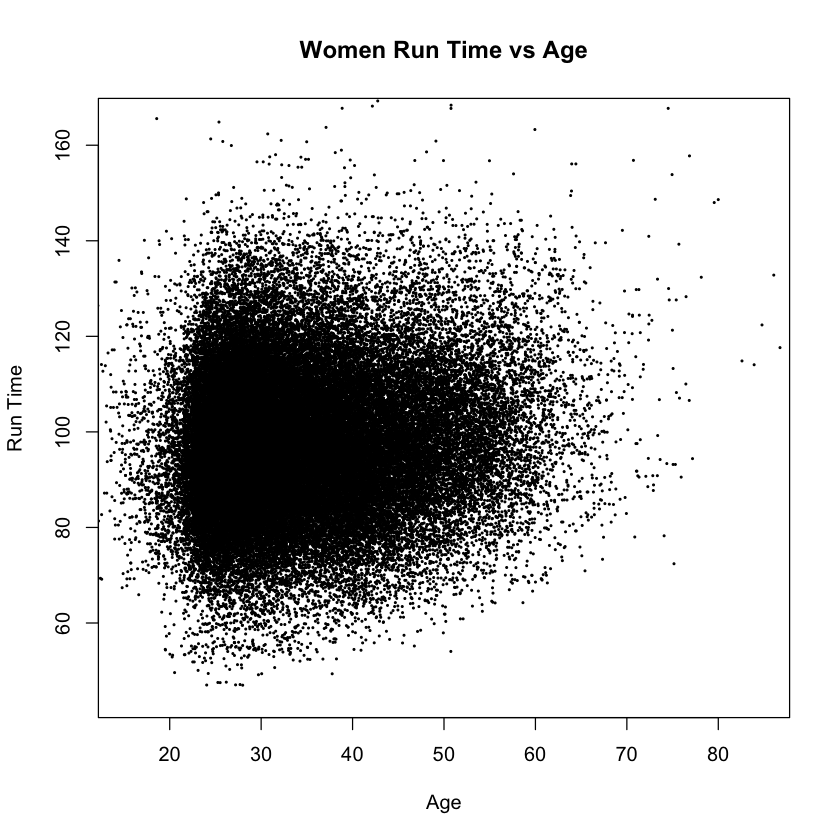

In [9]:
# Show the age and run time. for men first, then women
plot(runTime ~ jitter(age, amount = 0.5), data = MenData, pch = 19,cex = 0.2, ylim = c(45, 165), xlim = c(15, 85), xlab = "Age", ylab = "Run Time")
title(main = "Men Run Time vs Age")

plot(runTime ~ jitter(age, amount = 0.5), data = WomenData, pch = 19,cex = 0.2, ylim = c(45, 165), xlim = c(15, 85), xlab = "Age", ylab = "Run Time")
title(main = "Women Run Time vs Age")


# Also Box Plots

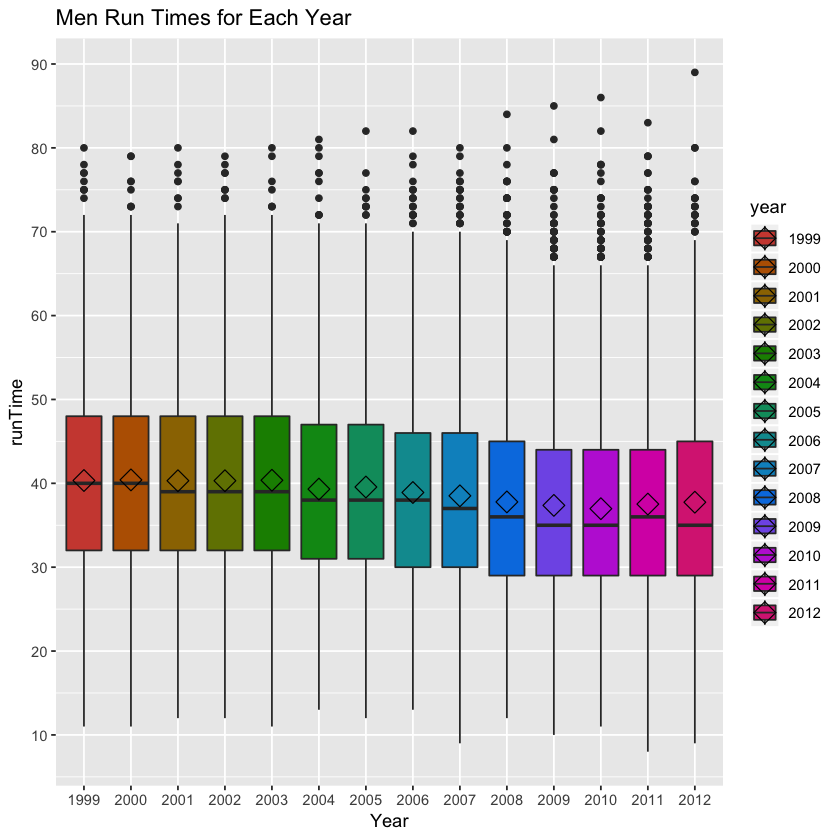

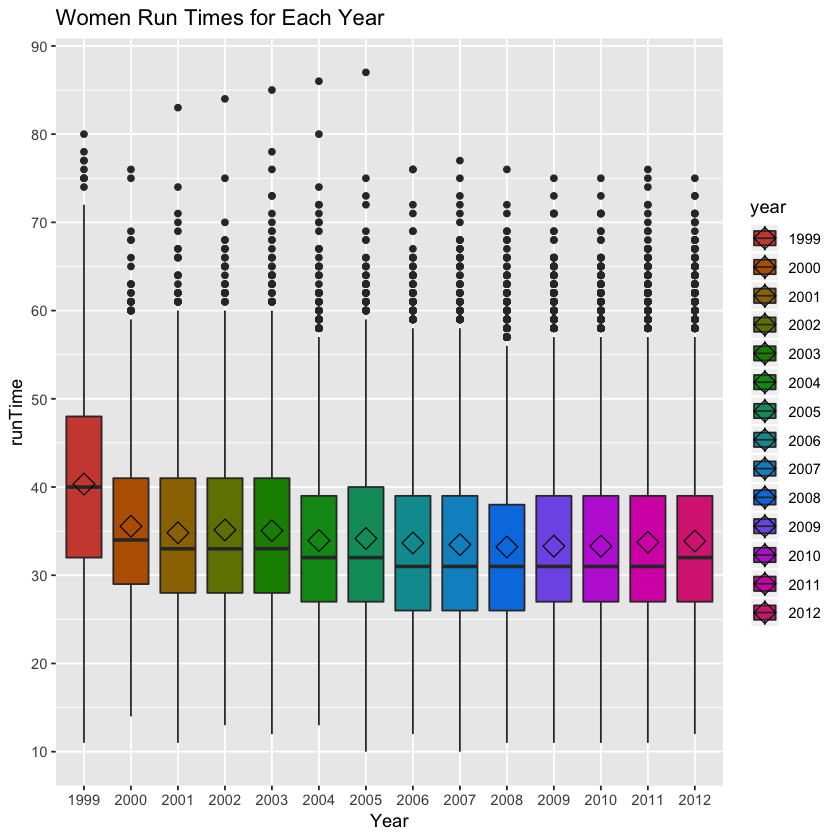

In [10]:
# Visualize the RUN TIME of the runners by year: first men, then women as above
ggplot(MenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(MenPlots$age, n = 10)) + 
    ggtitle("Men Run Times for Each Year") + xlab('Year') + ylab('runTime') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    scale_fill_hue(l=50, c=105)

ggplot(WomenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(WomenPlots$age, n = 10)) + 
    ggtitle("Women Run Times for Each Year") + xlab('Year') + ylab('runTime') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    scale_fill_hue(l=50, c=105)

# QQ Plots

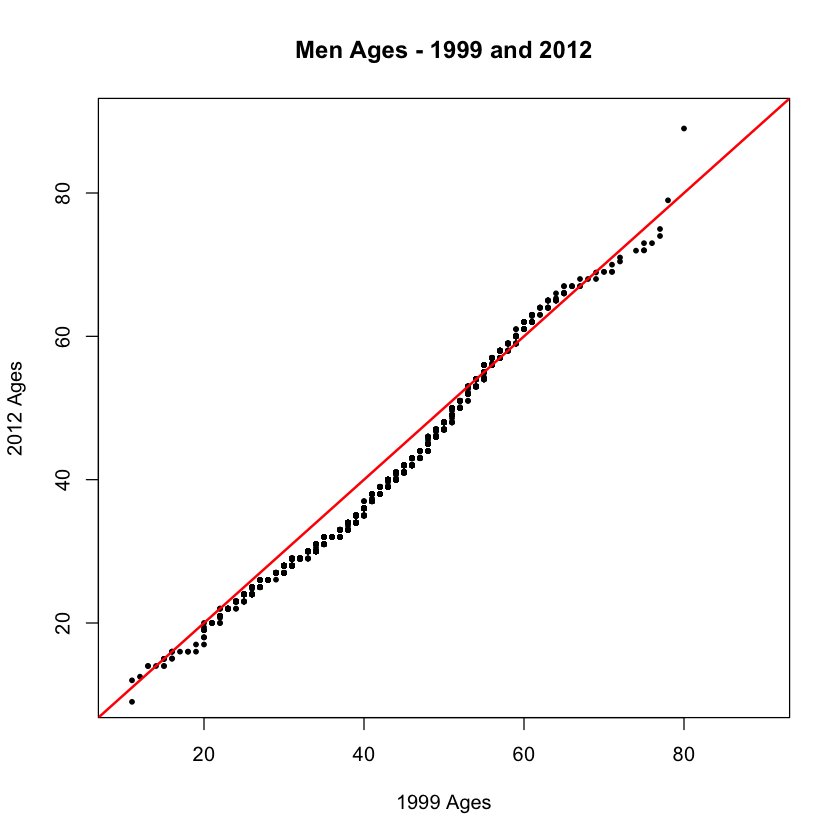

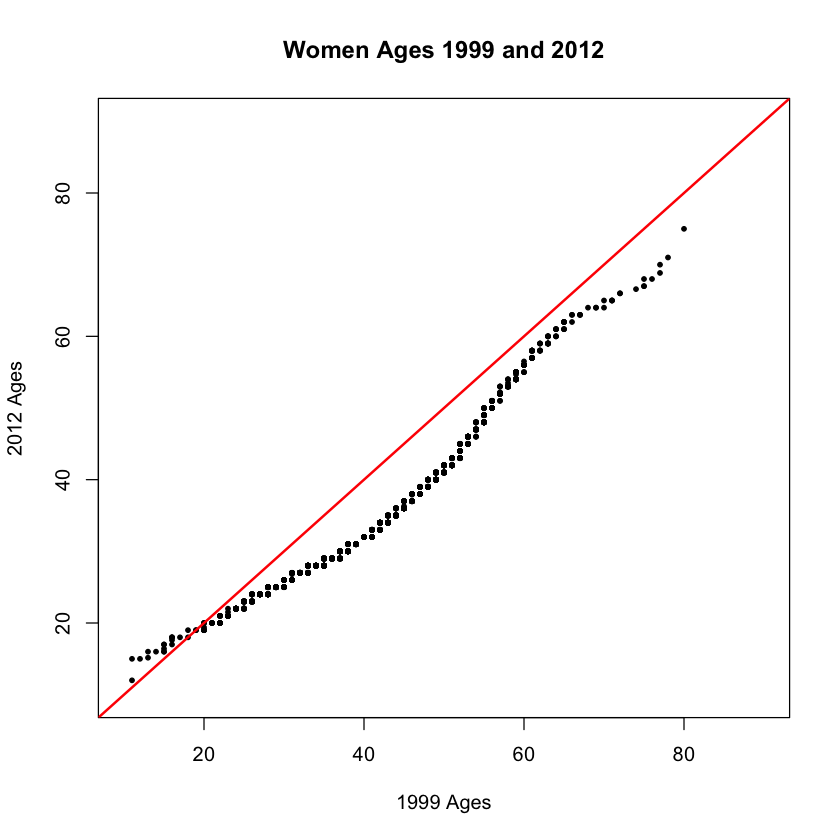

In [11]:
#Quantile Quantile plots.

Men99 = MenData[ MenData$year == 1999, "age" ]
Men12 = MenData[ MenData$year == 2012, "age" ]

qqplot(Men99, Men12, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "1999 Ages",
       ylab = "2012 Ages", 
       main = "Men Ages - 1999 and 2012")
abline(a =0, b = 1, col="red", lwd = 2)


Women99 = WomenData[ WomenData$year == 1999, "age" ]
Women12 = WomenData[ WomenData$year == 2012, "age" ]

qqplot(Women99, Women12, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "1999 Ages",
       ylab = "2012 Ages", 
       main = "Women Ages 1999 and 2012")
abline(a =0, b = 1, col="red", lwd = 2)

# Density Curves

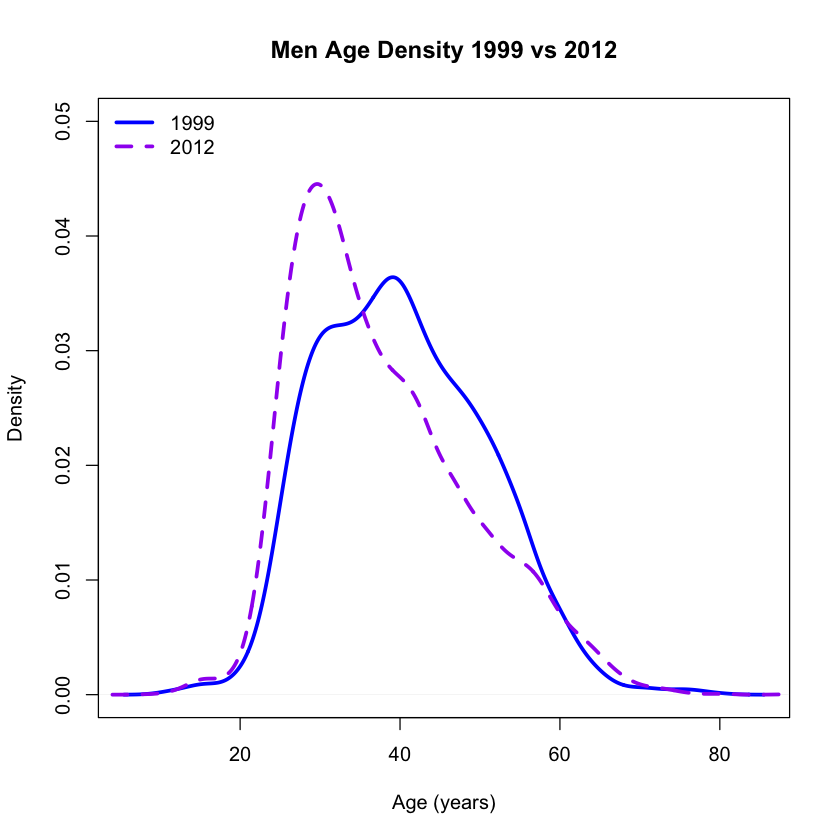

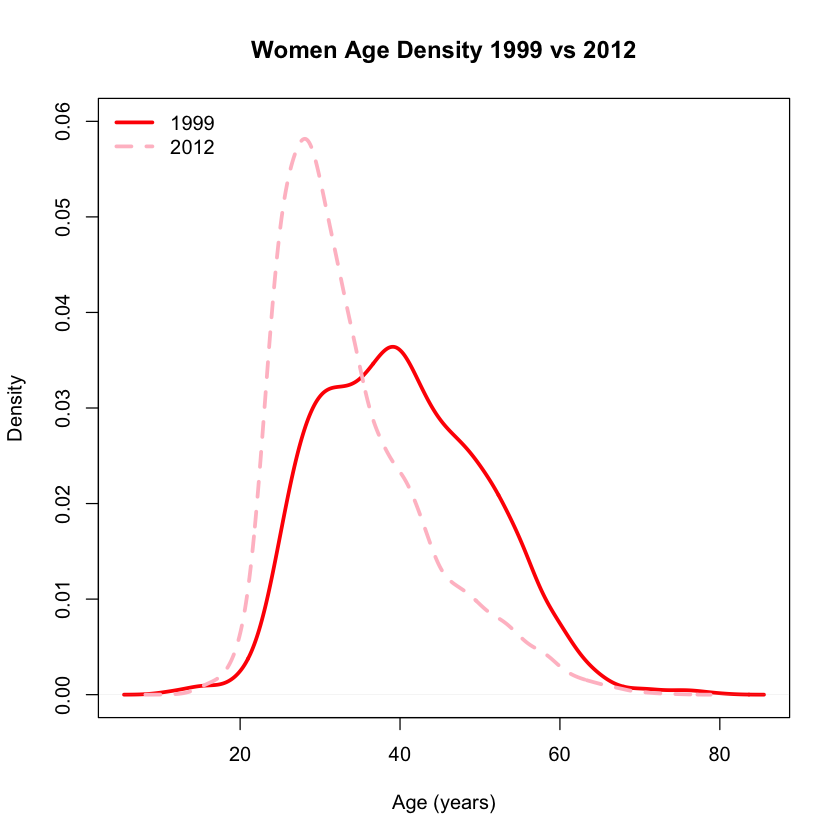

In [12]:
# Density Plots - men then women

plot(density(Men99, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "blue",
     lwd = 3,  xlab = "Age (years)",  main = "")
title(main = "Men Age Density 1999 vs 2012")
lines(density(Men12, na.rm = TRUE), 
      lwd = 3, lty = 2, col="purple")
legend("topleft", col = c("blue", "purple"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

plot(density(Women99, na.rm = TRUE), 
     ylim = c(0, 0.06), col = "red",
     lwd = 3,  xlab = "Age (years)",  main = "")
title(main = "Women Age Density 1999 vs 2012")
lines(density(Women12, na.rm = TRUE), 
      lwd = 3, lty = 2, col="pink")
legend("topleft", col = c("red", "pink"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

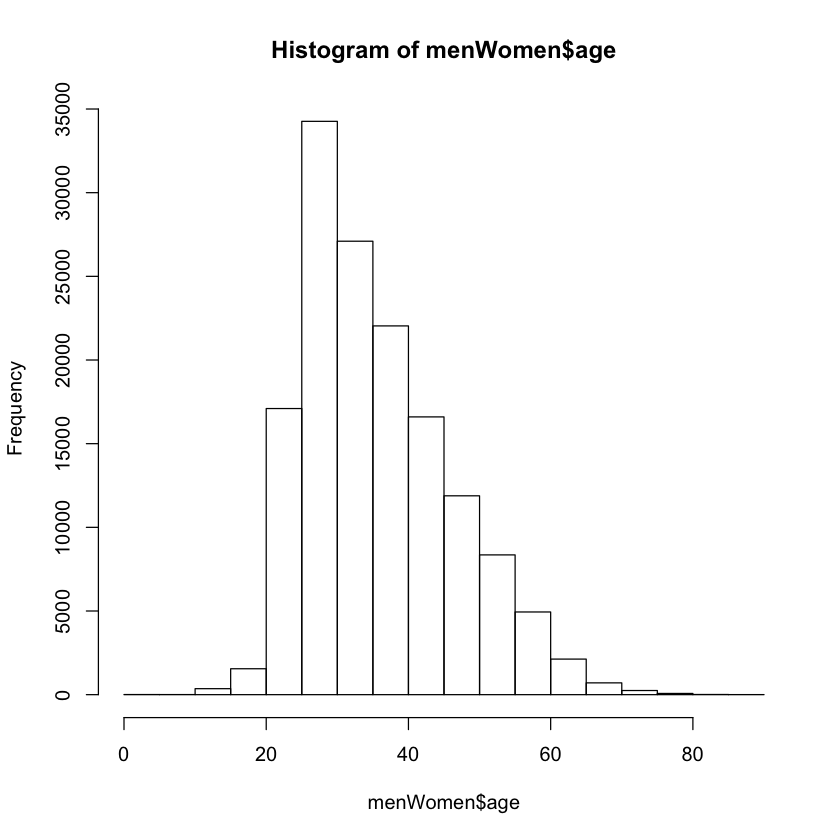

In [13]:
hist(menWomen$age)

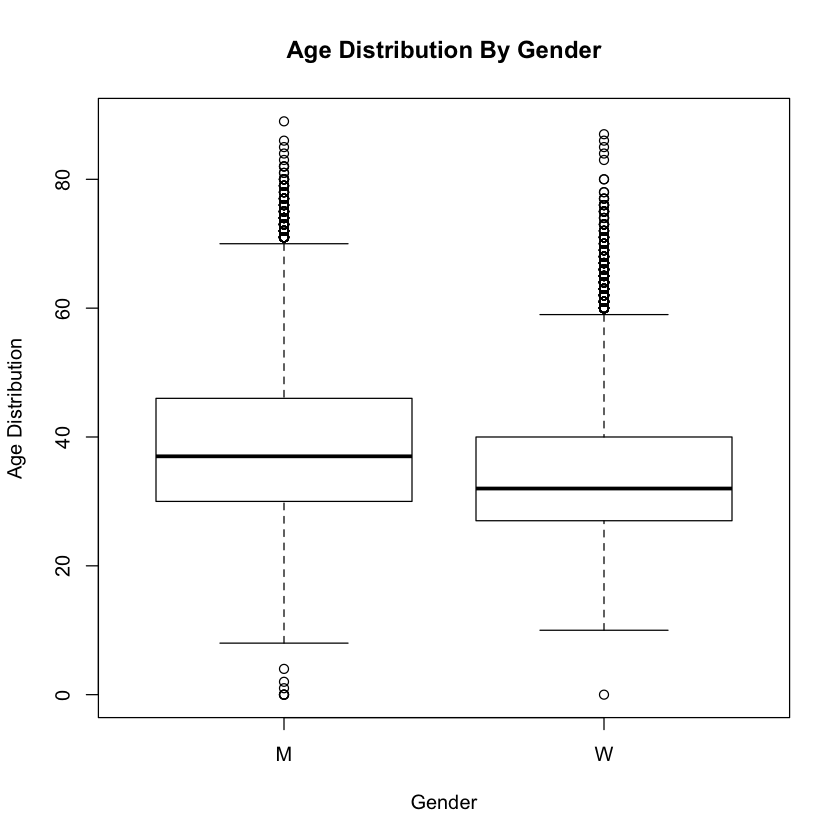

In [14]:
boxplot(age~sex,data=menWomen, main="Age Distribution By Gender", 
   xlab="Gender", ylab="Age Distribution")

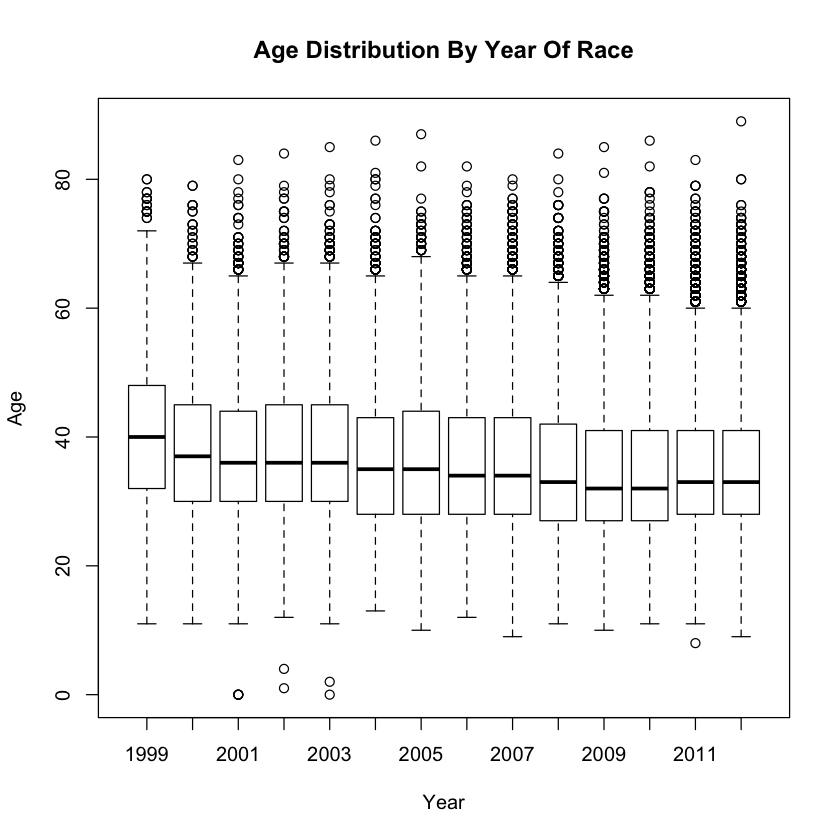

In [15]:
boxplot(age~year,data=menWomen, main="Age Distribution By Year Of Race", 
   xlab="Year", ylab="Age")

In [16]:
meanAges = tapply(menWomen$age, menWomen$year, mean)

In [17]:
names(meanAges)

[1] "1999" "2000" "2001" "2002" "2003" "2004" "2005" "2006" "2007" "2008"
[11] "2009" "2010" "2011" "2012"

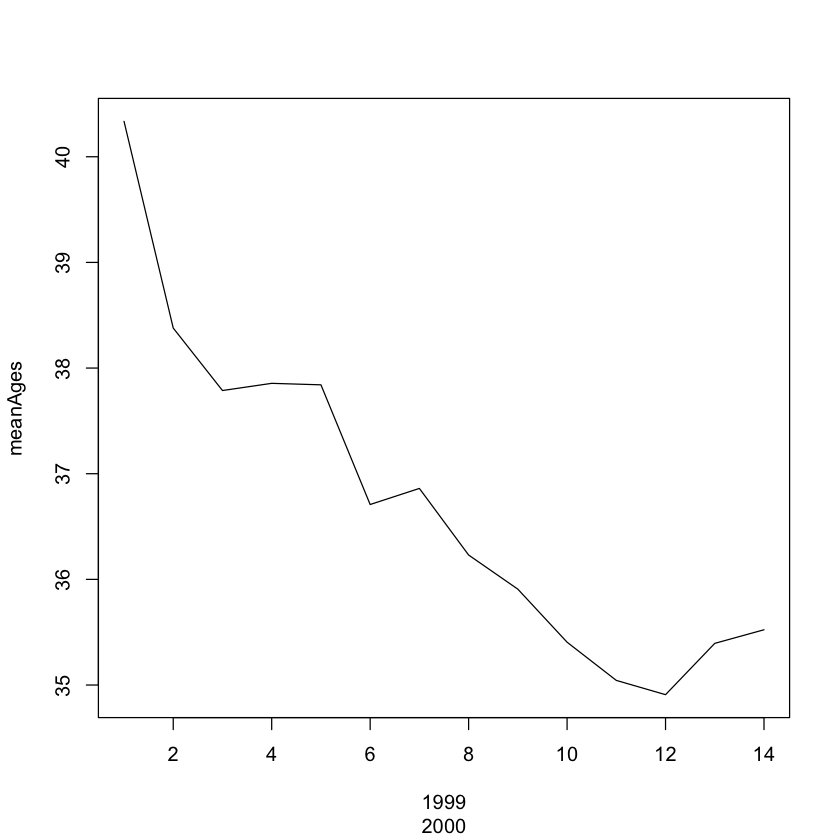

In [18]:
plot(meanAges, type='l', xlab=names(meanAges))